 <img src="https://img.freepik.com/free-vector/realistic-horizontal-cinema-movie-time-poster-with-3d-glasses-snacks-tickets-clapper-reel-blue-background-with-bokeh-vector-illustration_1284-77013.jpg" 
    width = 1000 height = 30>

<div style="text-align:center; font-family:Georgia;">
    <h1>Does Budget affects Gross?</h1>
</div>

<div style="font-family:Georgia;">
    <h3>Index:</h1>
</div>

1. Introduction <br>
2. Dataset Description <br>
3. Import Libraries and Warnings<br>
4. Load, view & describe data<br>
5. Data Analysis<br>
6. Conclusions <div>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h3>1. Introduction:</h1>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This project delves into the intricate workings of the film industry, focusing on the extraction, transformation, and loading of a movie dataset from Kaggle. We'll explore the effective methods for importing essential Python libraries, cleansing the dataset, ensuring data accuracy, and executing hypothesis testing to ascertain the impact of various elements on a movie's financial success. Moreover, the assignment will emphasize the optimal Python techniques for data analysis and visualization.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **Hypotheses**
<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Upon initial examination of the dataset, it becomes evident that multiple elements influence a movie's box office success. The data sheds light on aspects such as release dates, ratings, production teams, and budgets, offering a comprehensive understanding of the movie industry. Considering the commercial nature of filmmaking, curiosity has sparked an exploration into the correlation between a film's budget and its gross revenue. This led to the formulation of a hypothesis: Does a larger budget correlate with higher gross earnings? Additionally, the dataset prompts an investigation into the variability of gross earnings across different genres. The aim is to identify which genres typically yield the highest box office returns and to analyze the current trends and patterns associated with these genres.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h3>2. Dataset Description:</h1>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This data was scraped from IMDb and includes 6820 movies from 1986-2016.
<br>    

| Variable | Description
| :------------- | :-------------
| budget | the budget of a movie. Some movies don't have this, so it appears as 0
| company | the production company
| country | country of origin
| director | the director
| genre | main genre of the movie.
| gross |revenue of the movie
| name | name of the movie
| rating | rating of the movie (R, PG, etc.)
| released | release date (YYYY-MM-DD)
| runtime | duration of the movie
| score | IMDb user rating
| votes | number of user votes
| star | main actor/actress
| writer | writer of the movie
| year | year of release


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Data Source: https://www.kaggle.com/datasets/danielgrijalvas/movies/data 
<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Retrieved: [November 30, 2023]
<br>
    

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h3>3. Import Libraries and Warnings:</h3>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; In this Jupyter Notebook analysis, we begin by importing essential Python libraries, a crucial step for data manipulation, statistical analysis, and visualization. Simultaneously, we execute a code snippet to suppress warnings, ensuring a streamlined output during our workflow. 
</div>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing libraries
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # create graphs
import seaborn as sns # create graphs
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm # Statistical modeling and hypothesis testing

In [3]:
# Random Seed
np.random.seed(42)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 <div style="font-family:Georgia;">
    <h3>4. Load, View, and Describe Data:</h3>
</div>

 <div style="font-family:Georgia;">
    <h4>4.1 Data Display within the Dataframe:</h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The dataset, housed within a 'data' folder, is promptly imported.
</div>

In [4]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
movie_filename = "movies.csv"

# Read the CSV files and create backup copies
movie_df_data = pd.read_csv(data_path + movie_filename)

# Create working copies of the dataframes for analysis
movie_df = movie_df_data.copy()

In [5]:
#Check the number of rows and  number of columns 
movie_df.shape

(7668, 15)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; It comprises 15 columns and 7,668 rows, with the `display.max_columns` command activated for a comprehensive view.
</div>

In [6]:
# Option to display all columns
pd.set_option('display.max_columns', None)
movie_df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2029,Liebestraum,R,Mystery,1991,November 1991 (United States),5.9,1500.0,Mike Figgis,Mike Figgis,Kevin Anderson,United States,6900000.0,133645.0,Initial Entertainment Group (IEG),112.0
2882,Beautiful Girls,R,Comedy,1996,"February 9, 1996 (United States)",7.1,32000.0,Ted Demme,Scott Rosenberg,Matt Dillon,United States,NaN,10597759.0,Miramax,112.0
2748,Man of the House,PG,Comedy,1995,"March 3, 1995 (United States)",5.2,8900.0,James Orr,David E. Peckinpah,Chevy Chase,United States,NaN,40070995.0,All Girl Productions,96.0
5559,After.Life,R,Drama,2009,"December 16, 2009 (Brazil)",5.9,37000.0,Agnieszka Wojtowicz-Vosloo,Agnieszka Wojtowicz-Vosloo,Christina Ricci,United States,4500000.0,2425535.0,Lleju Productions,104.0
1728,The Freshman,PG,Comedy,1990,"July 27, 1990 (United States)",6.5,19000.0,Andrew Bergman,Andrew Bergman,Marlon Brando,United States,12000000.0,21460601.0,TriStar Pictures,102.0


In [7]:
#  Now when using describe, the numbers will be displayed without scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Get the statistical summary of numeric columns of DataFrame: movie_df
movie_df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000,7665.000,7665.000,5497.000,7479.000,7664.000
mean,2000.405,6.390,88108.505,35589876.193,78500541.018,107.262
std,11.154,0.969,163323.764,41457296.602,165725124.319,18.581
min,1980.000,1.900,7.000,3000.000,309.000,55.000
25%,1991.000,5.800,9100.000,10000000.000,4532055.500,95.000
50%,2000.000,6.500,33000.000,20500000.000,20205757.000,104.000
75%,2010.000,7.100,93000.000,45000000.000,76016691.500,116.000
max,2020.000,9.300,2400000.000,356000000.000,2847246203.000,366.000


There are a few insights we can take out of this output:

- In the kaggle description of the dataset it states that the maximum `year` included is 2016, still there are movies from 2020 as seen in the maximum year values.
- The `score` is cluster around a score of 6.3, with their 25th, 50th and 75th percentiles increasing progresively up to 7.1, while the maximum is 9.3. None of the movies reach to a perfect score of 10.
- The minimum `duration` of a movie is 55 minutes, while three quarters of the data have a duration of almost two houres (116 minutes). The maximum value triples the 75% percentile, with a duration of six hours.
- There is a huge difference regarding the minimum and maximum values of `budget`and `gross` respectively. This can be better observed in the histograms below.

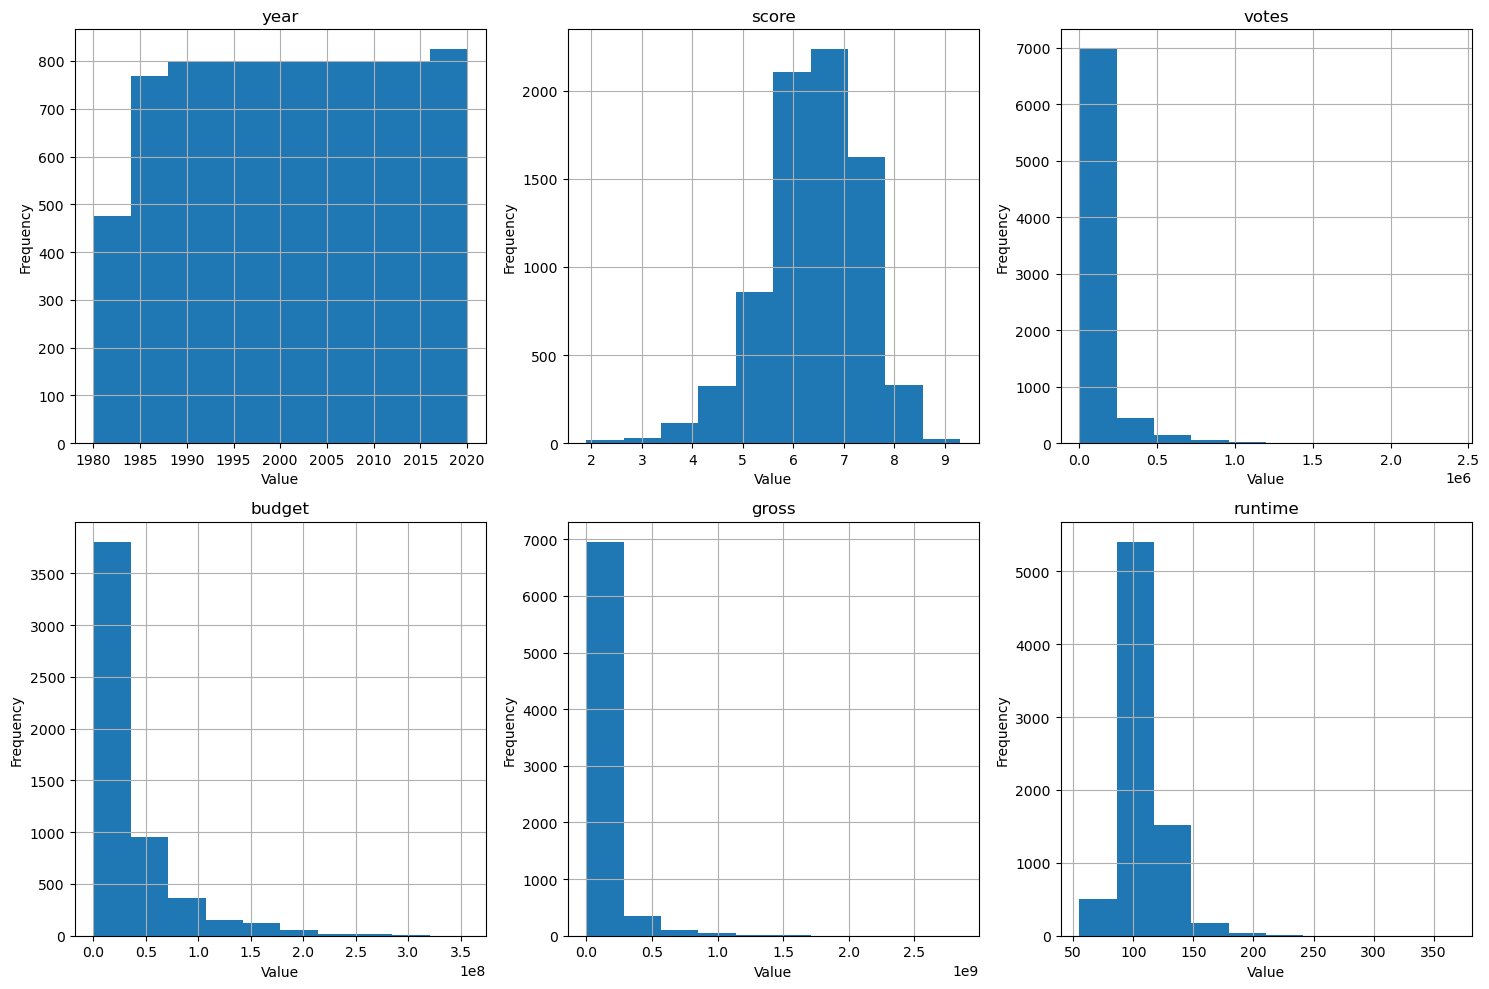

In [8]:
# Total Quality Points
desc_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
desc_df = movie_df[desc_columns]

# Set the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Plot histograms for each column
for i, column in enumerate(desc_df.columns):
    row = i // num_cols
    col = i % num_cols
    desc_df[column].hist(ax=axes[row, col], bins=10)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show();

The histograms reflect the points mentioned above.

- The movies are in the dataset are from 1980 to 2020.
- The `score` values are clustered between the values of 6 and 8
- The `budget` and `gross` seem to have similar distribution as most of the values are below 0.5 million dollars.
- The `runtime`is clusted around 100 minutes, with the outlier mentioned above of 366 minutes.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia">    
<h4> 4.2 Clean missing values:</h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Before starting the analysis, the data needs to be clean. For starters, all null values are going to be checked.

In [9]:
#Checking out the percentage of missing values out of the total dataset
missing_data = movie_df[movie_df.isna().sum(axis=1)>0]
len(missing_data)/len(movie_df)*100

29.30359937402191

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; An overall of 29% of the data is null. The next step is to go deeper on detail.

In [10]:
# Count of missing values
missing_count = movie_df.isnull().sum()

# Percentage of missing values
missing_percentage = ((movie_df.isnull() | movie_df.isna()).sum() * 100 / movie_df.index.size).round(2)

# Combine the results into a new DataFrame
missing_info_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])

# Display the combined DataFrame
print(missing_info_df)

          Missing Count  Missing Percentage
name                  0               0.000
rating               77               1.000
genre                 0               0.000
year                  0               0.000
released              2               0.030
score                 3               0.040
votes                 3               0.040
director              0               0.000
writer                3               0.040
star                  1               0.010
country               3               0.040
budget             2171              28.310
gross               189               2.460
company              17               0.220
runtime               4               0.050


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; A detailed assessment of missing values across columns indicates a discrepancy: while most columns have less than 1% missing values, the 'budget' column stands out with about 29% nulls.

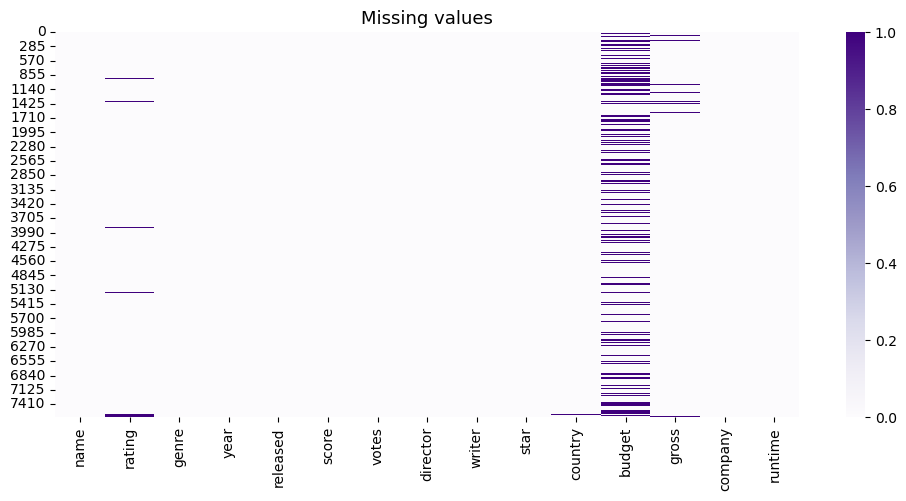

In [11]:
#Display of missing values using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(movie_df.isnull(), cmap = "Purples")                       
plt.title("Missing values", fontsize = 13)
plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; To maintain the dataset's integrity and minimize loss of information, we adopt a strategic approach to handle these missing values. For columns with less than 1% missing values, we opt for deletion, given their negligible impact on the overall dataset. Conversely, for the 'budget' and 'gross' columns, we replace nulls with the median, a more robust measure against outliers compared to the mean.

In [12]:
#Defining the median
median_budget=movie_df['budget'].median()
median_gross=movie_df['gross'].median()

In [13]:
# Replace any budget and gross value that is null for the median value
movie_df['budget'] = movie_df['budget'].apply(lambda x: median_budget if pd.isna(x)  else x)
movie_df['gross'] = movie_df['gross'].apply(lambda x: median_gross if pd.isna(x)  else x)

In [14]:
# Count of missing values
missing_count = movie_df.isnull().sum()

# Percentage of missing values
missing_percentage = ((movie_df.isnull() | movie_df.isna()).sum() * 100 / movie_df.index.size).round(2)

# Combine the results into a new DataFrame
missing_info_df = pd.concat([missing_count, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])

# Display the combined DataFrame
print(missing_info_df)

          Missing Count  Missing Percentage
name                  0               0.000
rating               77               1.000
genre                 0               0.000
year                  0               0.000
released              2               0.030
score                 3               0.040
votes                 3               0.040
director              0               0.000
writer                3               0.040
star                  1               0.010
country               3               0.040
budget                0               0.000
gross                 0               0.000
company              17               0.220
runtime               4               0.050


In [15]:
#Checking out the percentage of missing values out of the total dataset
missing_data = movie_df[movie_df.isna().sum(axis=1)>0]
len(missing_data)/len(movie_df)*100

1.2258737610850288

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This thorough cleaning process significantly reduces the null value percentage in the dataset to a more manageable 1.2%. To further refine our dataset, we drop the remaining rows with null values, considering their minimal influence on the analysis.  

In [16]:
#Dropping nulls
movie_no_nulls = movie_df.dropna()
movie_no_nulls.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400,927000.000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000,46998772.000,Warner Bros.,146.000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800,65000.000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000,58853106.000,Columbia Pictures,104.000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700,1200000.000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000,538375067.000,Lucasfilm,124.000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700,221000.000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000,83453539.000,Paramount Pictures,88.000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300,108000.000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000,39846344.000,Orion Pictures,98.000


In [17]:
#Checking for null values
movie_no_nulls.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The dataframe created to drop the nulls is correct, so now the original dataframe will be replaced by that one.

In [18]:
# Now it looks great, let's substitute the prior df by this
movie_df = movie_no_nulls

In [19]:
#Check the number of rows and  number of columns 
movie_df.shape

(7574, 15)

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; There are 94 less rows than the initial dataset. Now the data is clean from missing values.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia">    
<h4> 4.3 Type Conversion:</h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Ensuring data accuracy, we then focus on data type conversion, a critical step for precised analysis. This thorough cleaning and preparation set the foundation for a reliable and insightful analysis, demonstrating the importance of rigorous data handling in research.
</div>

In [20]:
#Displaying what type of dtype is each column
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7574 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7574 non-null   object 
 1   rating    7574 non-null   object 
 2   genre     7574 non-null   object 
 3   year      7574 non-null   int64  
 4   released  7574 non-null   object 
 5   score     7574 non-null   float64
 6   votes     7574 non-null   float64
 7   director  7574 non-null   object 
 8   writer    7574 non-null   object 
 9   star      7574 non-null   object 
 10  country   7574 non-null   object 
 11  budget    7574 non-null   float64
 12  gross     7574 non-null   float64
 13  company   7574 non-null   object 
 14  runtime   7574 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 946.8+ KB


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; All `float64` will be changed for `int64` with the exception of `score` which has decimal values. For the `object` type columns they will be change to `category`.
</div>

In [21]:
#Changing the dataype of the 'object' columns
cat_cols=['name', 'rating','genre','released', 'director', 'writer', 'star', 'country', 'company']
for col in cat_cols: 
    movie_df[col]=movie_df[col].astype('category')

In [22]:
#Changing the dataype of the 'object' columns
cat_cols2=['year', 'votes','budget','gross', 'runtime']
for col in cat_cols2: 
    movie_df[col]=movie_df[col].astype('int64')

In [23]:
#Displaying what type of dtype is each column
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7574 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      7574 non-null   category
 1   rating    7574 non-null   category
 2   genre     7574 non-null   category
 3   year      7574 non-null   int64   
 4   released  7574 non-null   category
 5   score     7574 non-null   float64 
 6   votes     7574 non-null   int64   
 7   director  7574 non-null   category
 8   writer    7574 non-null   category
 9   star      7574 non-null   category
 10  country   7574 non-null   category
 11  budget    7574 non-null   int64   
 12  gross     7574 non-null   int64   
 13  company   7574 non-null   category
 14  runtime   7574 non-null   int64   
dtypes: category(9), float64(1), int64(5)
memory usage: 1.4 MB


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; After cleaning and type converting the columns, the analysis can begin.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
#  Now when using describe, the numbers will be displayed without scientific notation 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Get the statistical summary of numeric columns of DataFrame: movie_df
movie_df.describe()

,year,score,votes,budget,gross,runtime
count,7574.000,7574.000,7574.000,7574.000,7574.000,7574.000
mean,2000.377,6.389,88940.742,31495503.581,77736142.615,107.291
std,11.109,0.968,164041.876,35922362.097,164648795.806,18.585
min,1980.000,1.900,35.000,3000.000,309.000,63.000
25%,1991.000,5.800,9400.000,14000000.000,4843455.250,95.000
50%,2000.000,6.500,33000.000,20500000.000,20205757.000,104.000
75%,2010.000,7.100,94000.000,32000000.000,74028959.000,116.000
max,2020.000,9.300,2400000.000,356000000.000,2847246203.000,366.000


There are a few insights we can take out of this output:

- The values of the 25% and 75% percentile of `votes` increase in 300 and 1000 respectively. 
- Now the count of budget is the same as the other columns.
- The 25% and 75% percentiles also varies for the `budget`and `gross` columns.
- The minimum `runtime` value increases.

<div style="font-family:Georgia;">
    <h3>5. Data Analysis:</h3>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Through Data analysis, the veracity of the hypothesis is going to be determined.
For this step to be perfomed, there were some steps that had to be done before, including data cleaning and preparation.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Testing hypothesis would allow us to validate assumptions about the data, ensuring that the patterns/trends are not just random.  Most importantly, it will reduce biases about the data.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; **_Hypothesis:_ Does Budget affect Gross throughout Genres and is it the same for a Domestic or International Film?**
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The analysis will be divided into four parts, first a brief analysis of `budget` and `gross` will be performed to figure out if there is a relationship between them. Following that, an analysis on `genre` will be performed to examine if a certain type of genre has a stronger effect among those variables. Then an analysis if being a `Foreign` or `Hollywood` film have any effect at all and finally, how does `budget` affects `gross` among genres depending on the movie type.
<br>

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h4>5.1 Budget vs Gross </h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; In this initial part of the analysis a relationship betwwen `budget` and `gross` will be determined.

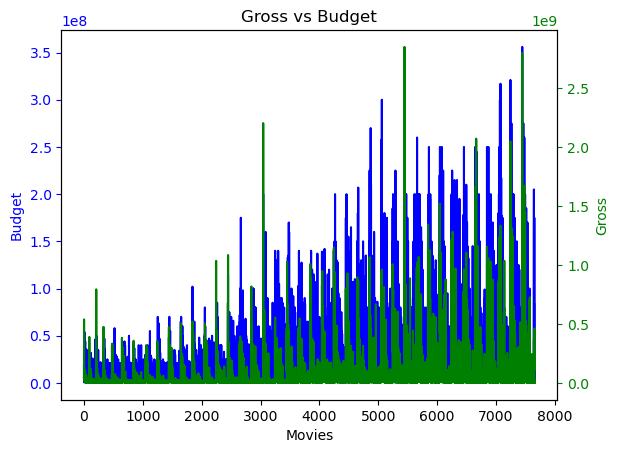

In [25]:
#Plotting budgets and gross
fig, ax1 = plt.subplots()

ax1.plot(movie_df['budget'], label='Budget', color='blue')
ax1.set_xlabel('Movies')
ax1.set_ylabel('Budget', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(movie_df['gross'], label='Gross', color='green')
ax2.set_ylabel('Gross', color='green')
ax2.tick_params('y', colors='green')

plt.title('Gross vs Budget')

plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; An initial relationship can be seen as the spikes on the `budget` goes hand in hand with the spkies on `gross`. To further analyze this a correlation matrix is performed.

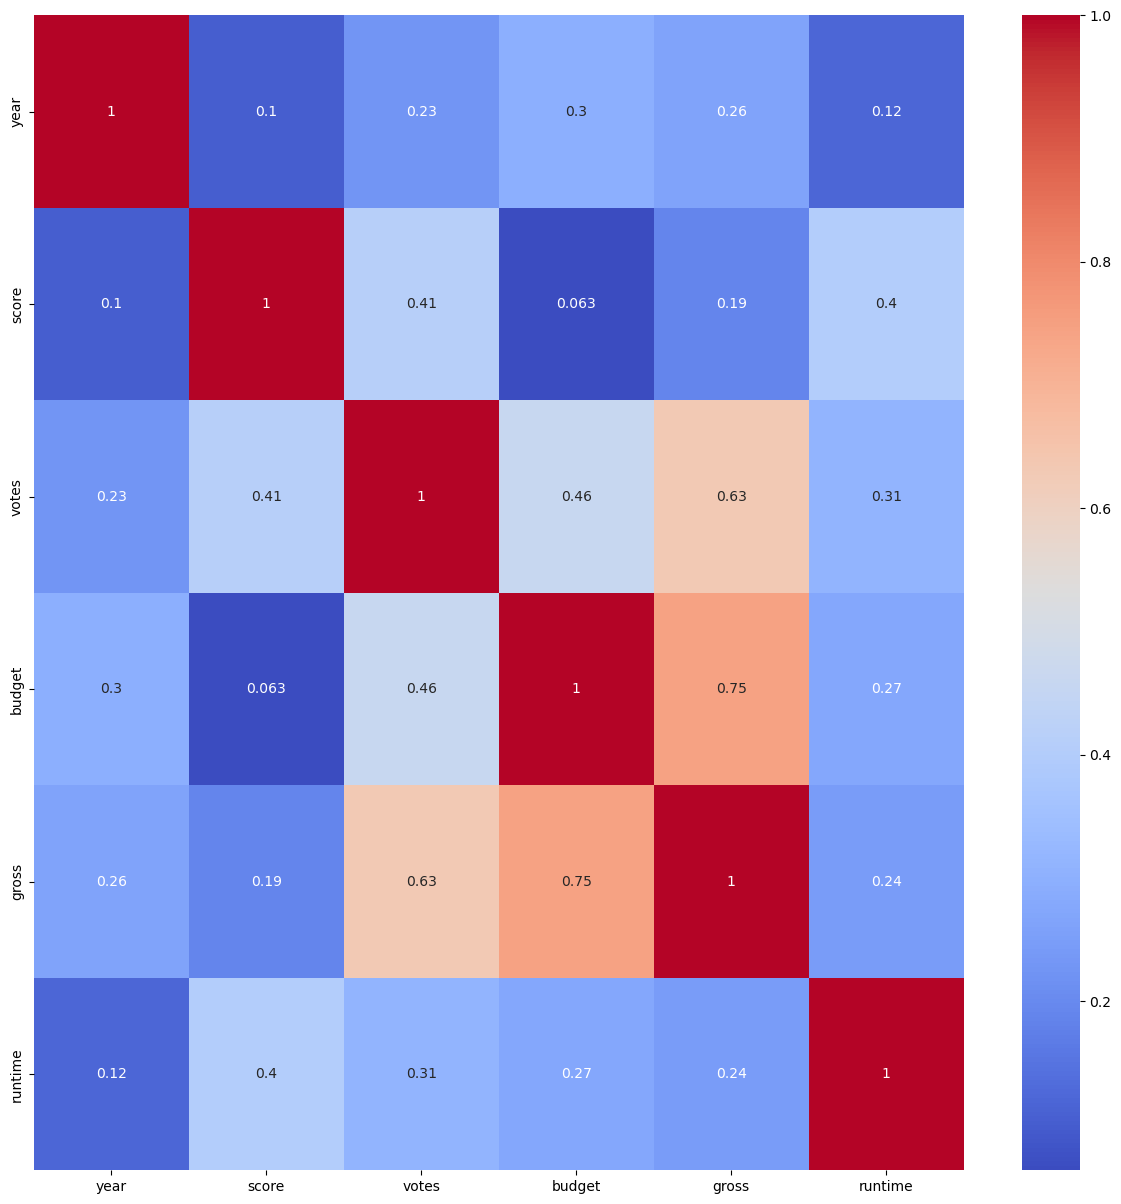

In [26]:
#Correlation Matrix
plt.figure(figsize=(15,15))
sns.heatmap(movie_df.select_dtypes(np.number).corr(),annot=True, cmap='coolwarm');

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; From the correlation matrix, there is an initial insight about the relationship of these variables, where a positive relationship of 0.75 is seen.

Correlation between budget and gross: 0.7463731857601901


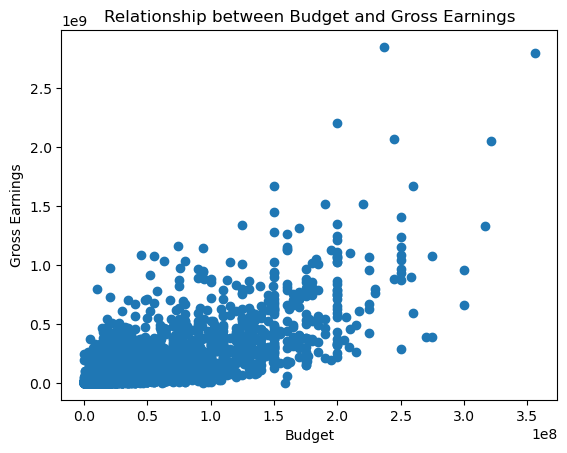

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     9523.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:47:55   Log-Likelihood:            -1.5096e+05
No. Observations:                7574   AIC:                         3.019e+05
Df Residuals:                    7572   BIC:                         3.019e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.001e+07   1.67e+06    -17.919      0.0

In [27]:
# Calculate the correlation between budget and gross
budget_gross_corr = movie_df['budget'].corr(movie_df['gross'])
print(f"Correlation between budget and gross: {budget_gross_corr}")

# Create a scatter plot showing the relationship between budget and gross
plt.scatter(movie_df['budget'], movie_df['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.title('Relationship between Budget and Gross Earnings')
plt.show()

# Perform a linear regression analysis
# Add a constant to the independent variable
X = sm.add_constant(movie_df['budget'])
y = movie_df['gross']

# Create the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Previously, an identification of a positive correlation between `budget` and `gross` was established. Through regression analysis, we aimed to ascertain if the `gross` was influenced by `budget`. The p-value was found to be less than 0.05 and the adjusted R square was 0.55 meaning that only 55% of the `gross` is explain by `budget`, there seem to be other factors that affect the dependant variable but that is not part of the hypothesis being tested. This indicated that the `gross` was explained by the previously mentioned variable. Meaning that an increment of US$ 1 dollar in `budget` will result in an increment of 3.42 in `gross`.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h4>5.1 Genres </h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Following up on the analysis, figuring out the relationship among genres is important to see if the `budget` and `gross` relationship mantains. 

In [28]:
#Checking unique values
movie_df['genre'].unique()

['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', ..., 'Western', 'Thriller', 'Mystery', 'Sport', 'Musical']
Length: 18
Categories (18, object): ['Action', 'Adventure', 'Animation', 'Biography', ..., 'Sci-Fi', 'Sport', 'Thriller', 'Western']

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; There are 18 types of `genre` but not all of them have the same number of entries. 

In [29]:
# Copying the needed columns: genre and name
genre_name = movie_df[['genre', 'name']].copy()

#Total inputs per genre
genre_count = genre_name['name'].groupby(genre_name['genre']).count().sort_values(ascending=False).copy()

#Display
genre_count

genre
Comedy       2230
Action       1695
Drama        1476
Crime         544
Biography     439
Adventure     426
Animation     334
Horror        318
Fantasy        43
Mystery        20
Thriller       16
Family         10
Sci-Fi          9
Romance         8
Western         3
Music           1
Musical         1
Sport           1
Name: name, dtype: int64

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; For a strong analysis, only the genres with over 500 entries will be taken into consideration as having a small sample may not result in an accurate result.

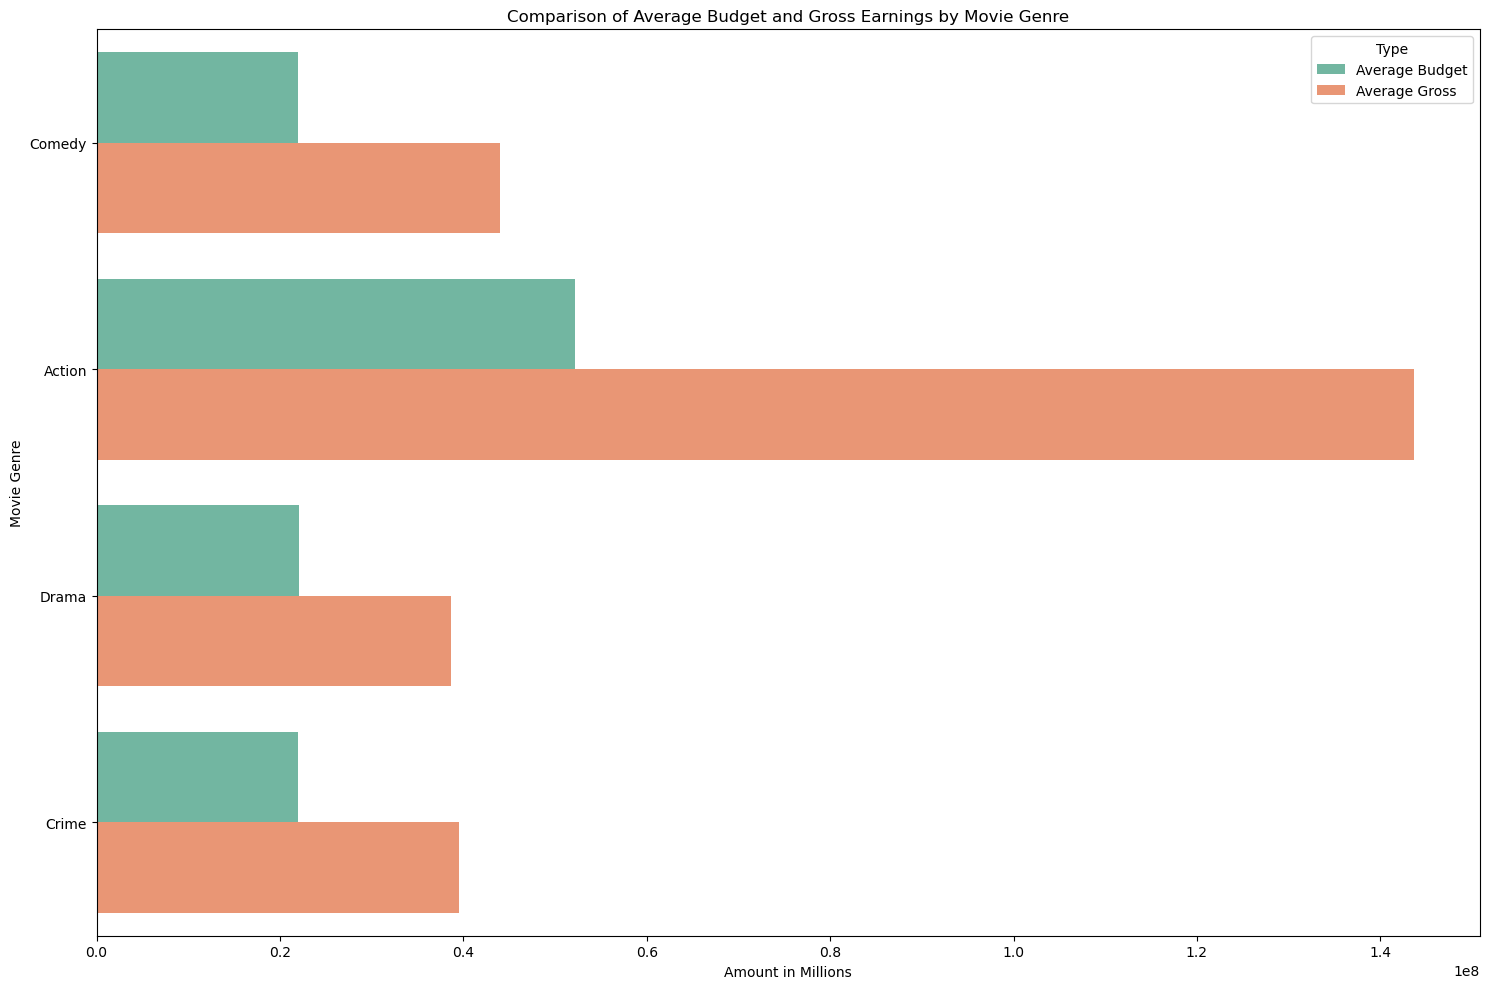

In [30]:
# Filter genres with over 500 entries
genre_counts = movie_df['genre'].value_counts()
selected_genres = genre_counts[genre_counts > 500].index
filtered_movie_df = movie_df[movie_df['genre'].isin(selected_genres)]

# Calculate the mean budget and gross for each genre for visualization
mean_budget_by_genre = filtered_movie_df.groupby('genre')['budget'].mean()
mean_gross_by_genre = filtered_movie_df.groupby('genre')['gross'].mean()

# Combine the data into a single DataFrame for plotting
combined_data = pd.DataFrame({
    'Average Budget': mean_budget_by_genre,
    'Average Gross': mean_gross_by_genre
}).reset_index()

# Melt the DataFrame for seaborn
melted_data = combined_data.melt(id_vars='genre', var_name='Type', value_name='Amount')

# Create a bar plot with specified order for y-axis
plt.figure(figsize=(15, 10))
sns.barplot(x='Amount', y='genre', hue='Type', data=melted_data, palette='Set2', order=selected_genres)
plt.xlabel('Amount in Millions')
plt.ylabel('Movie Genre')
plt.title('Comparison of Average Budget and Gross Earnings by Movie Genre')
plt.tight_layout()

# Show the plot
plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; There seems to be similarity across the budgets of `Comedy`, `Drama` and `Crime`, the gross varies a little but as an overall is similar. `Action` is the genre with the highest average gross and budget.

In [31]:
# Assuming 'movie_df' is your dataset
selected_genres = ['Comedy', 'Action', 'Drama', 'Crime']
filtered_movie_df = movie_df[movie_df['genre'].isin(selected_genres)]

for genre in selected_genres:
    genre_data = filtered_movie_df[filtered_movie_df['genre'] == genre]

    # Check if there are enough data points for the regression
    if len(genre_data) < 2:
        print(f"Not enough data points for genre: {genre}")
        continue

    X = sm.add_constant(genre_data['budget'])
    y = genre_data['gross']
    
    model = sm.OLS(y, X).fit()

    print(f"Genre: {genre}")
    print(model.summary())


Genre: Comedy
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     841.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          3.19e-157
Time:                        18:47:55   Log-Likelihood:                -43104.
No. Observations:                2230   AIC:                         8.621e+04
Df Residuals:                    2228   BIC:                         8.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.545e+06   2.07e+06     -

From the regressions, we can determine:
- _Comedy:_ The adjusted R square is 0.27 which is lower than expected, meaning that only 27% of `gross` is explain by `budget` . The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 2.16, meaning that for an increase of US 1 dollar in `budget` an increment of 2.16 will occur in `gross`.
<br>
- _Crime:_ The adjusted R square is 0.32 which is lower than expected. The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 2.55, meaning that for an increase of US 1 dollar in `budget` an increment of 2.55 will occur in `gross`.
<br>
- _Action:_ The adjusted R square is 0.596 which is almost the same value as the overall regresion. The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 3.59, meaning that for an increase of US 1 dollar in `budget` an increment of 3.59 will occur in `gross`.
<br>
- _Drama:_ The adjusted R square is 0.28 which is lower than expected. The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 2.83, meaning that for an increase of US 1 dollar in `budget` an increment of 2.83 will occur in `gross`.
<br>
Overall, the evidence of `budget`affecting `gross` exists among genres, the models explains a range of 28% and 60% of the `gross`. 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h4>5.3 Foreign vs Hollywood </h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; The final step is to differientiate if the movie is from `Hollywood` or `Foreign`.

In [32]:
#Defyning unique values
movie_df['country'].unique()

['United Kingdom', 'United States', 'South Africa', 'West Germany', 'Canada', ..., 'Iceland', 'Chile', 'Panama', 'Malta', 'Lebanon']
Length: 59
Categories (59, object): ['Argentina', 'Aruba', 'Australia', 'Austria', ..., 'United States', 'Vietnam', 'West Germany', 'Yugoslavia']

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; There are 59 countries. From that a new variable is created based on `country`, where `Hollywood` means that the movie is from `United States` and `Foreign` if it is from elsewhere.

In [33]:
# Create a new variable 'type_country' based on the 'Country' column
movie_df['type_country'] = 'Foreign'  # Default value for all rows
movie_df.loc[movie_df['country'] == 'United States', 'type_country'] = 'Hollywood'

# Display the updated DataFrame
print(movie_df)

                                                name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7652                               The Eight Hundred  Not Rated     Action   
7653                                      The Quarry          R      Crime   
7656                                           Tulsa      PG-13     Comedy   
7658                       Black Wall Street Burning          R      Drama   
7659                                       I Am Fear  Not Rated     Horror   

      year                          released  score    votes   

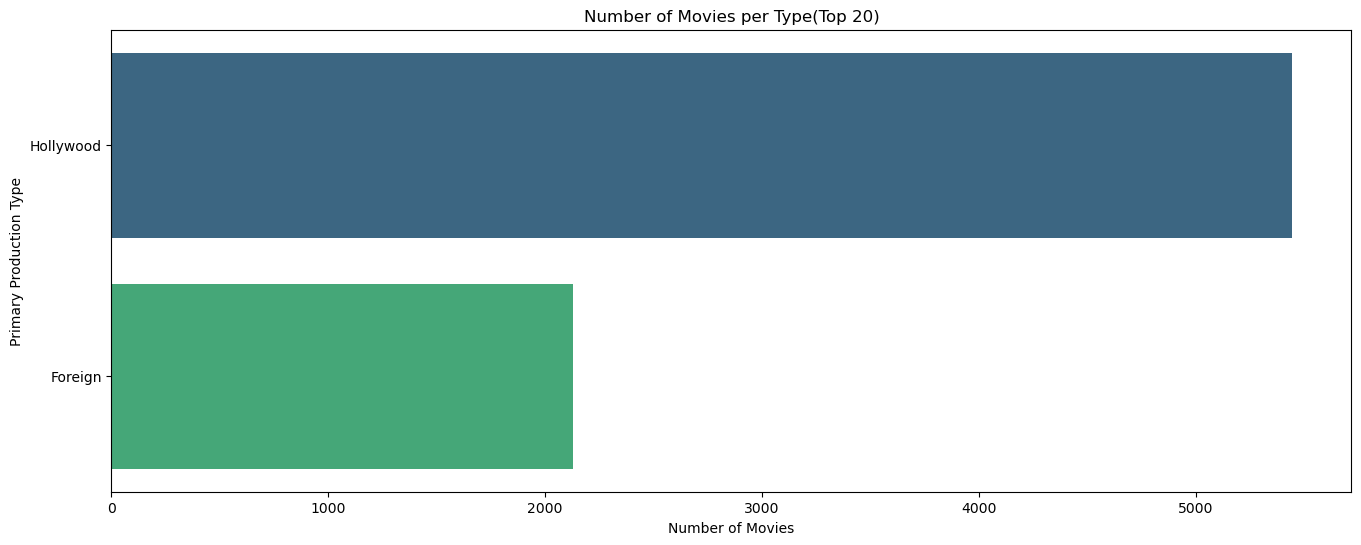

In [34]:
# Number of Movies per Primary Production Country (Top 20)
plt.figure(figsize=(16, 6))
sns.countplot(data=movie_df, y='type_country', order=movie_df['type_country'].value_counts().head(20).index, palette="viridis")
plt.title('Number of Movies per Type(Top 20)')
plt.xlabel('Number of Movies')
plt.ylabel('Primary Production Type')
plt.show()

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Even thoug `Foreign` has entries from 58 countries while `Hollywood` only has from one, still it doubles the number of entries.
<br>

In [35]:
type_country2 = ['Foreign', 'Hollywood']

for type_country in type_country2:
    # Filter data for the current type_country
    type_country_data = movie_df[movie_df['type_country'] == type_country]

    # Check if there are enough data points for the regression
    if len(type_country_data) < 2:
        print(f"Not enough data points for type_country: {type_country}")
        continue

    X = sm.add_constant(type_country_data['budget'])
    y = type_country_data['gross']
    
    model = sm.OLS(y, X).fit()

    print(f"Type: {type_country}")
    print(model.summary())

Type: Foreign
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2193.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:47:56   Log-Likelihood:                -41973.
No. Observations:                2128   AIC:                         8.395e+04
Df Residuals:                    2126   BIC:                         8.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.726e+07   2.67e+06    -1

From the regressions, we can determine:
- _Foreign:_ The adjusted R square is 0.50 which is lower than expected, meaning that only half of `gross` is explain by `budget` . The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 3.34, meaning that for an increase of US 1 dollar in `budget` an increment of 3.34 will occur in `gross`.
<br>
- _Hollywood:_ The adjusted R square is 0.56, relatively close to the overall regression. The p-value is less than 0.05 meaning that the `gross` was explained by the previously mentioned variable. The coefficient for budget is 3.41, meaning that for an increase of US 1 dollar in `budget` an increment of 3.41 will occur in `gross`.
<br>

Overall, the results among regressions are very similar which can be an insight as it does not matter whter a movie is produced in the `Unites States` or not, because `budget` is still going to affect `gross`.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h4>5.4 Effect on Genre by Type Country</h4>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; To perform this part of the analysis a dummy variable needs to be created based on `type_country` where the dummy is 1 if the value is `Hollywood` and 0 if it is not.

In [36]:
# Create a dummy variable for 'Hollywood'
movie_df['is_hollywood'] = (movie_df['type_country'] == 'Hollywood').astype(int)
movie_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,type_country,is_hollywood
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Foreign,0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Hollywood,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Hollywood,1
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Hollywood,1
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Hollywood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.800,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,Foreign,0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400,2400,Scott Teems,Scott Teems,Shea Whigham,United States,20500000,3661,Prowess Pictures,98,Hollywood,1
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000,413378,Pryor Entertainment,120,Hollywood,1
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20205757,Notis Studio,78,Hollywood,1


In [37]:
# Assuming 'movie_df' is your dataset
selected_genres = ['Comedy', 'Action', 'Drama', 'Crime']
filtered_movie_df = movie_df[movie_df['genre'].isin(selected_genres)]

for genre in selected_genres:
    genre_data = filtered_movie_df[filtered_movie_df['genre'] == genre]

    # Check if there are enough data points for the regression
    if len(genre_data) < 2:
        print(f"Not enough data points for genre: {genre}")
        continue

    X = sm.add_constant(genre_data[['budget', 'is_hollywood']])
    y = genre_data['gross']
    
    model = sm.OLS(y, X).fit()

    print(f"Genre: {genre}")
    print(model.summary())

Genre: Comedy
                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     435.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          2.39e-160
Time:                        18:47:56   Log-Likelihood:                -43093.
No. Observations:                2230   AIC:                         8.619e+04
Df Residuals:                    2227   BIC:                         8.621e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.499e+07   3.21e+06

From the regressions, we can determine:
- Adding the `is_hollywood`variable seems to increase all R squares compared to the regressions in section 5.2 Genres meaning that this helps explain the relationship between our variables. 
- Still the coefficient for the dummy is a small number meaning that if the movie is from `Hollywood` the gross will not increase by much in that specific genre.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="font-family:Georgia;">
    <h3>6. Conclusion:</h1>
</div>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; This project has provided a deep dive into the multifaceted nature of the film industry through the meticulous analysis of a Kaggle movie dataset. By harnessing the power of Python and its libraries, we successfully imported, cleansed, and transformed the dataset, paving the way for accurate data analysis and hypothesis testing.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; To deepen our understanding, an Ordinary Least Squares (OLS) regression analysis was conducted. The results were revealing: with an R-squared value of 0.557, it was determined that approximately 55% of the variability in gross earnings can be explained by the movie's budget. This suggests that while budget is a significant factor in determining a movie's gross earnings, other elements at play also influence financial success. The p-value, being less than 0.05, reinforces the statistical significance of the budget's impact. The regression analysis also yielded an intriguing insight: for every additional dollar invested in the budget, there is an expected increase of $3.42 in gross earnings. This finding not only substantiates the initial hypothesis about the relationship between budget and gross but also quantifies the extent of this impact.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Further analysis of the Kaggle movie dataset tests our hypothesis by exploring the relationship between budget and gross earnings across different genres and the distinction between Hollywood and Foreign films. This nuanced approach was vital in understanding the varying impact of budget on gross earnings within different film industry segments.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  In the genre-specific analysis, which focused on genres with more than 500 entries for robustness, notable differences were observed. While Comedy, Drama, and Crime genres showed similar budget patterns, their gross earnings varied slightly. Action genre stood out with the highest average gross and budget. The regression analyses for each genre revealed different degrees of correlation between budget and gross:
- _Comedy:_ With an adjusted R-squared of 0.27, the analysis indicated that budget accounts for 27% of the variance in gross earnings.
- _Crime:_ Exhibited a slightly higher correlation with an adjusted R-squared of 0.32.
- _Action:_ Showed a strong correlation, with an adjusted R-squared of 0.596, aligning closely with the overall regression analysis.
- _Drama:_ Presented an adjusted R-squared of 0.28, similar to Comedy and Crime genres.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; These findings confirmed that budget influences gross earnings across genres, although the extent of this influence varies, ranging from 28% to 60%.
Further differentiation based on the movie's origin (Hollywood vs. Foreign) yielded more insights:
- _Foreign Films:_ Demonstrated that half of the variance in gross earnings could be explained by budget, with an adjusted R-squared of 0.50.
- _Hollywood Films:_ Showed a slightly stronger correlation with an adjusted R-squared of 0.56.
<br>

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Interestingly, adding a dummy variable indicating whether a movie is Hollywood-produced or not slightly increased all R-squared values in the genre-based regression analyses. This suggests that being a Hollywood production does contribute to the explanation of gross earnings. However, the dummy variable's coefficient indicated that the gross increase due to Hollywood production is small within specific genres.

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; In conclusion, this comprehensive analysis illustrates that while budget is a significant factor in determining a movie's gross earnings, its impact varies across genres and is influenced by whether the film is a Hollywood production. These insights provide a detailed understanding of the economic dynamics within the film industry, highlighting the nuanced interplay between financial investment, genre, and geographical origin in shaping a movie's commercial success. The findings from this study are invaluable for filmmakers, producers, and industry analysts, offering a data-driven basis for strategic decision-making in film production and marketing.